# Multi-linear Regression - Predicting the total sales of a clothing store

# Directories, libraries and data 

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Multilinear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Multilinear Regression


In [2]:
# libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [3]:
# data 
df = pd.read_csv('Clothing.csv')
df.head()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,750000,4411.765,41.0,1.0,1.0000,1.0000,1.5357,76,16.75596,17166.67,27177.04,170,41.0
1,1926395,4280.878,39.0,2.0,2.0000,3.0000,1.5357,192,22.49376,17166.67,27177.04,450,39.0
2,1250000,4166.667,40.0,1.0,2.0000,2.2222,1.4091,114,17.19120,292857.20,71570.55,300,40.0
3,694227,2670.104,40.0,1.0,1.0000,1.2833,1.3673,100,21.50260,22207.04,15000.00,260,40.0
4,750000,15000.000,44.0,2.0,1.9556,1.2833,1.3673,104,15.74279,22207.04,10000.00,50,44.0


In [4]:
desc = df.describe().round(2)
desc

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,833584.21,6334.75,38.77,1.28,2.07,1.57,1.39,121.14,18.96,58257.26,27829.22,151.05,42.81
std,583463.84,3739.34,5.22,0.64,1.02,0.71,0.39,64.44,7.34,107558.77,41501.94,112.50,13.30
min,50000.00,300.00,16.00,1.00,1.00,1.00,1.00,32.00,5.71,1000.00,350.00,16.00,16.00
25%,495340.00,3904.20,37.00,1.00,1.92,1.28,1.33,80.00,13.54,20000.00,10000.00,80.00,37.00
50%,694227.00,5278.94,39.00,1.00,1.96,1.28,1.37,104.00,17.74,22207.04,22859.85,120.00,40.00
75%,976817.00,7739.90,41.00,1.30,2.07,2.00,1.37,145.25,24.30,62269.23,22859.85,190.00,42.00
max,5000000.00,27000.00,66.00,10.00,8.00,9.00,4.00,582.00,43.33,1500000.00,400000.00,1214.00,90.00


# Fields

- **tsales** - annual sales in Dutch guilders
- **sales** - sales per square meter
- **margin** - gross-profit-margin
- **nown** - number of owners (managers)
- **nfull** - number of full-timers
- **npart** - number of part-timers
- **naux** - number of helpers (temporary workers)
- **hoursw** - total number of hours worked
- **hourspw** - number of hours worked per worker
- **inv1** - investment in shop-premises
- **inv2** - investment in automation.
- **ssize** - sales floor space of the store (in m$^2$).
- **start** -  year start of business

# Data Analysis

In [5]:
# Re-order the columns

columns = ['margin', 'nown', 'nfull', 'npart', 'naux', 'hoursw', 'hourspw', 'ssize', 'start', 'inv1', 'inv2', 
           'sales', 'tsales']

df = df[columns]
df.head(1)

,margin,nown,nfull,npart,naux,hoursw,hourspw,ssize,start,inv1,inv2,sales,tsales
0,41.0,1.0,1.0,1.0,1.5357,76,16.75596,170,41.0,17166.67,27177.04,4411.765,750000


## Key Metrics for Total Sales:

- **sales (Sales per square meter)**: Sales per square meter directly measures how efficiently the floor space is utilized.
Formula: tsales = sales × ssize

- **ssize (Sales floor space of the store)**: Larger stores generally have higher total sales if they maintain similar efficiency.

- **hourpw (hours worked per worker)**: More hours worked often correlate with higher sales, especially in labor-intensive sectors.

- **inv1 (Investment in shop premises) & inv2 (Investment in automation)**: Higher investments in infrastructure and technology often lead to operational efficiency and increased sales.

- **nfull, npart, naux (Full-timers, part-timers, helpers)**: Workforce size and composition impact customer service and operations, influencing sales.

In [6]:
data = df[['sales', 'ssize', 'hoursw', 'hourspw', 'margin', 'inv1', 'inv2', 'nfull', 'npart', 'naux', 'nown', 'tsales']]
data.head(1)

,sales,ssize,hoursw,hourspw,margin,inv1,inv2,nfull,npart,naux,nown,tsales
0,4411.765,170,76,16.75596,41.0,17166.67,27177.04,1.0,1.0,1.5357,1.0,750000


# Check for multi-colinearity

<Axes: >

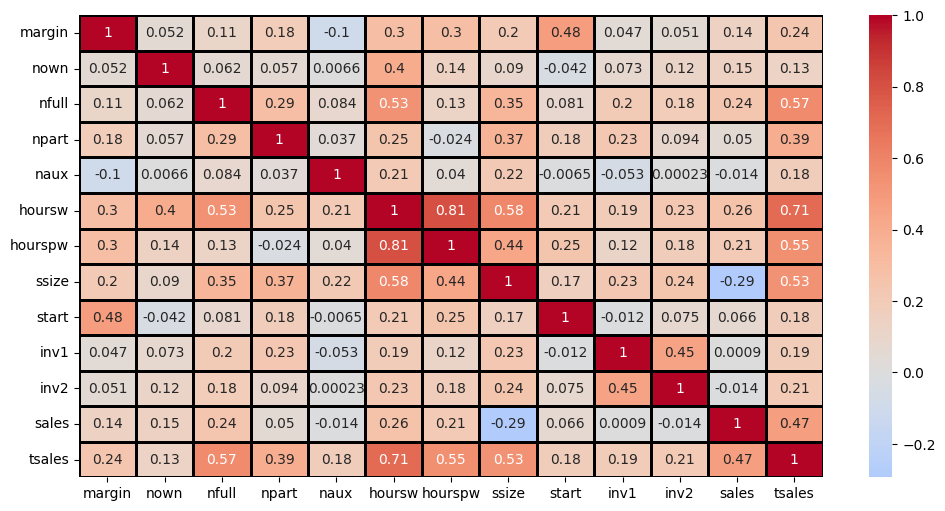

In [7]:
plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(),
           annot=True,
           fmt='.2g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black')

# Isolate X and y

In [8]:
X = df.loc[:, ['sales', 'ssize', 'hourspw','nfull',  'npart', 'naux', 'nown']]
y = df.iloc[:, -1]

<Axes: >

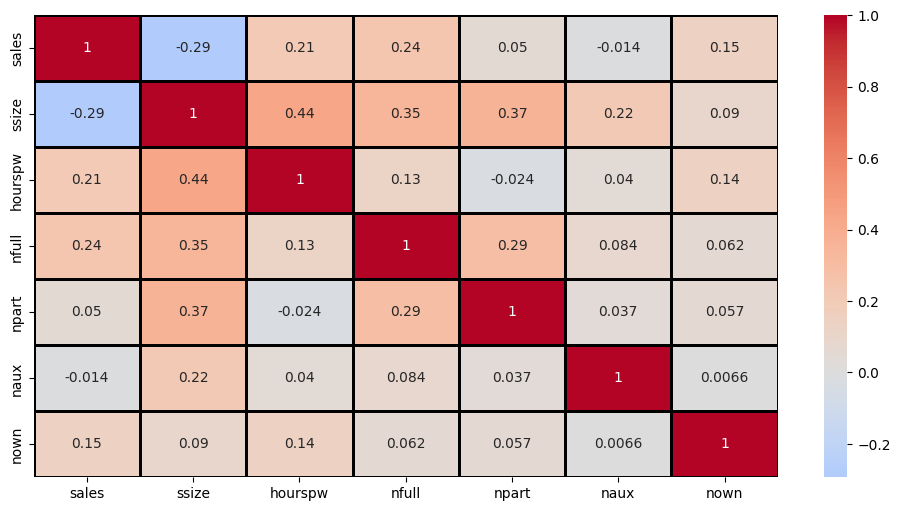

In [9]:
# Check for multi colinearity with the independent variables
plt.subplots(figsize=(12,6))
sns.heatmap(X.corr(),
           annot=True,
           fmt='.2g',
           center=0,
           cmap='coolwarm',
           linewidths=1,
           linecolor='black')

In [10]:
# Add a constant 
X = sm.add_constant(X)

# Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Training the model

In [12]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          7.20e-115
Time:                        20:47:12   Log-Likelihood:                -4414.0
No. Observations:                 320   AIC:                             8844.
Df Residuals:                     312   BIC:                             8874.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.014e+06   8.05e+04    -12.601      0.0

# Prediction

In [13]:
y_pred = model.predict(X_test)
y_pred[:2]

270    2.546757e+06
380    6.447533e+05
dtype: float64

# Metrics 

In [14]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 205227.94872784364
MSE: 168833377387.60513
RMSE: 410893.38932088594


# Residual Plot

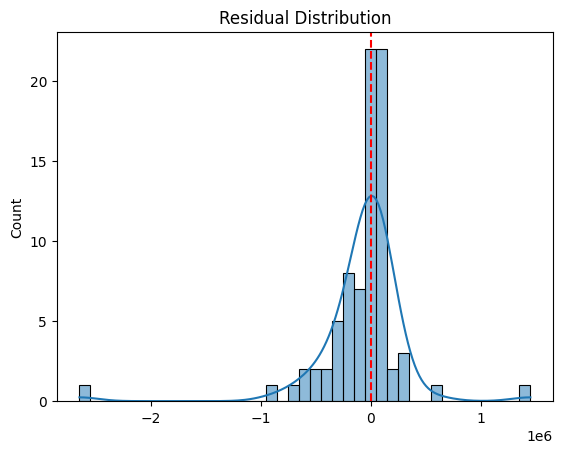

In [15]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()